**01_Introduction: Creating Plots**

In [6]:
from matplotlib import pyplot as plt
#general convention

***
Plotting a graph using lists of data as axes:
- plt.plot(x-axis, y-axis).
- If using a text editor, plt.show() has to be passed in order for the graph to be shown

Context: Plotting developer salaries by age
11 sets of data

In [8]:
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

Graph, axes and lines can be labelled.

In jpnb, for two lines to be plotted on the same graph, all plots have to be done in the same cell.

In a text editor, all plots have to be done before plt.show() is passed.

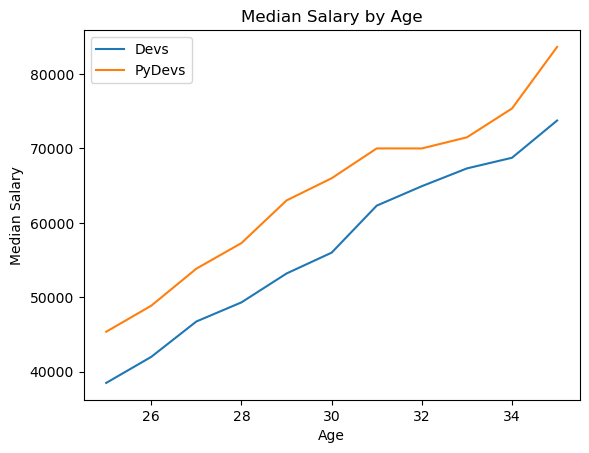

In [13]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, label = 'Devs')
plt.plot(ages, py_dev_y, label = 'PyDevs')

plt.legend()

#plt.legend(['Devs', 'PyDevs']) is another way. Matches corresponding .plot

***
Format Strings:
- color, linestyle, marker
- color parameter accepts hex values
- Refer to matplotlib documentation for specifics
- linewidth can also be specified (int), before the label

Format strings are arguments passed into the .plot line to customise the look of the plot

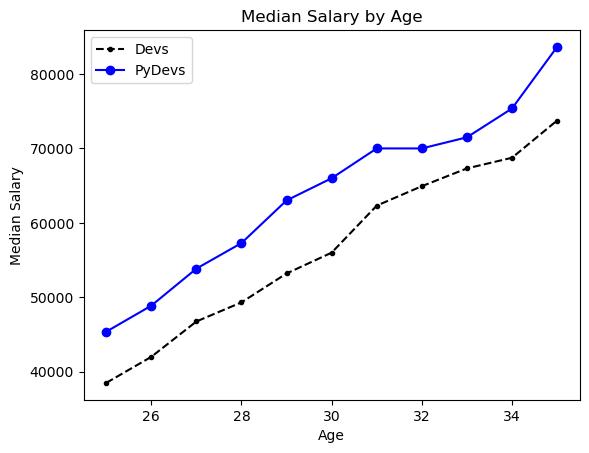

In [16]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, color = 'k', linestyle = '--', marker = '.', label = 'Devs')
plt.plot(ages, py_dev_y, 'b-o', label = 'PyDevs')
#format strings can be separated into the color, linestyle, marker parameters
#as well as passed in as a string directly, between y-axis and label

plt.legend()

***
Adding more Data:
- Shifting the order of plot statements matters. The later plot will overlap anything earlier
- plt.grid(True) can be passed if data extends alot to the right

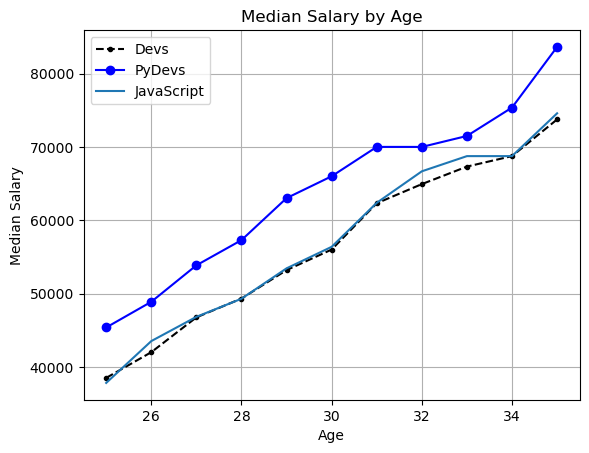

In [20]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, color = 'k', linestyle = '--', marker = '.', label = 'Devs')
plt.plot(ages, py_dev_y, 'b-o', label = 'PyDevs')
plt.plot(ages, js_dev_y, label = 'JavaScript')

plt.legend()
plt.grid(True)

***
Styling Plots:
- plt.style.available gives the list of available styles
- plt.style.use() applies the style passed into it
- Pass the style before plotting anything

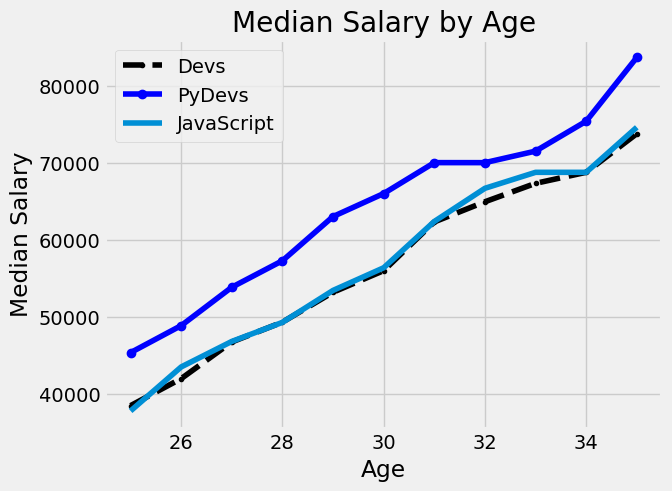

In [26]:
plt.style.use('fivethirtyeight')

plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, color = 'k', linestyle = '--', marker = '.', label = 'Devs')
plt.plot(ages, py_dev_y, 'b-o', label = 'PyDevs')
plt.plot(ages, js_dev_y, label = 'JavaScript')

plt.legend()
plt.grid(True)

***
Filling Areas:
- Fill color for area between two specified lines
- Uses plt.fill_between method

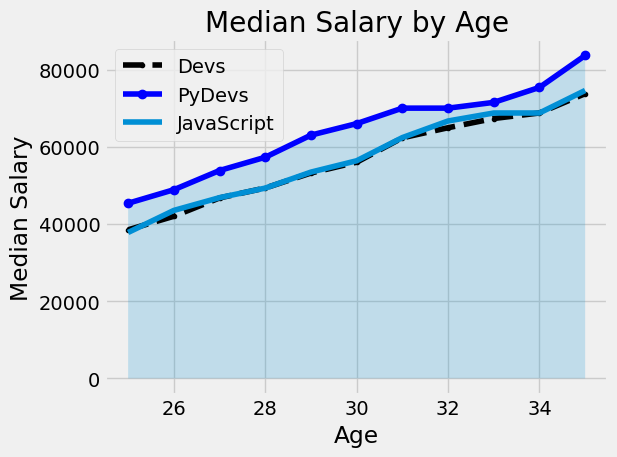

In [33]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, color = 'k', linestyle = '--', marker = '.', label = 'Devs')
plt.plot(ages, py_dev_y, 'b-o', label = 'PyDevs')
plt.plot(ages, js_dev_y, label = 'JavaScript')

plt.fill_between(ages, py_dev_y, alpha=0.20)
#.fill_between(axis, plot, other parameters)
#other parameters include color, alpha (transparency, decreases as value increases).
#for more parameters, use documentation

plt.legend()
plt.grid(True)
plt.tight_layout()

Naturally, fill_between does not necessarily have to fill wrt an axis. 
- Note that the x axis is still required as it defines the axis in which the fill between is oriented to. The two specified plots to fill between can then be passed in the other 2 arguments

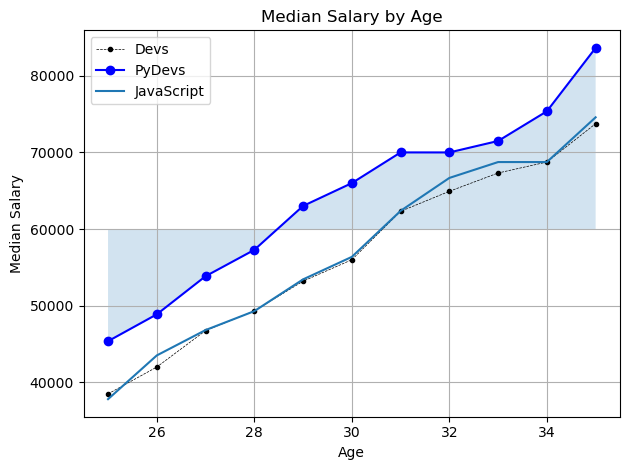

In [22]:
plt.title('Median Salary by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary')

plt.plot(ages, dev_y, linewidth=0.5, color = 'k', linestyle = '--', marker = '.', label = 'Devs')
plt.plot(ages, py_dev_y, 'b-o', label = 'PyDevs')
plt.plot(ages, js_dev_y, label = 'JavaScript')

plt.fill_between(ages, py_dev_y, 60000, alpha=0.20)
#insert as the 3rd argument. normally it defaults to 0

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.fill_between also inteprets conditionals, using the 'where' parameter
- Note the conditional only accepts array datatypes, not lists
- The interpolate parameter fills the area according to the plot. By default, it does this only for each x-value, meaning if only one x value holds True (for the conditional) between two other x values holding False, that x value wont be filled since it is only a point and not a range. For this reason, interpolate is normally always set to True
- Other than flat numbers, where also works on comparing two plots
- General plot parameters (color, label etc.) are accepted as well

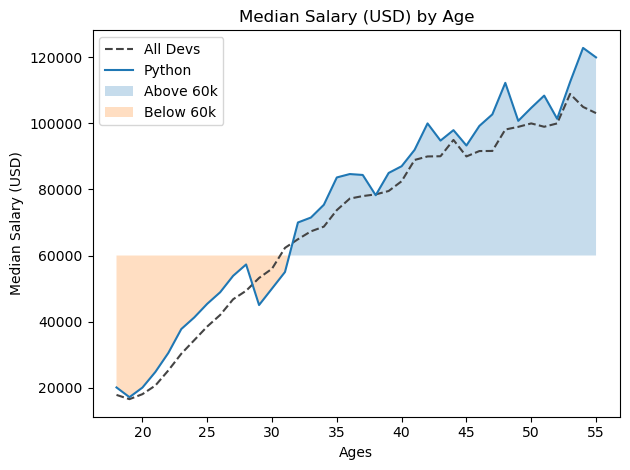

In [8]:
import pandas as pd
data = pd.read_csv('01_mpldata.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, 60000,
                 where=(py_salaries > 60000),
                 interpolate=True, alpha=0.25, label='Above 60k')
plt.fill_between(ages, py_salaries, 60000,
                 where=(py_salaries < 60000),
                 interpolate=True, alpha=0.25, label='Below 60k')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.legend()
plt.tight_layout()